In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
!which python

/Users/diegopiccinotti/.conda/envs/alphazero_singleplayer/bin/python


In [12]:
budget = 10000
env = "Bridge"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data.csv".format(env,budget))
df['Particles'] = df['Particles'].astype(str) + '_pf'
df = df.rename(columns={"Particles":"agent", "Cumulative reward": "total_reward", "Length":"length"})
df['type'] = ["pf"]*df.shape[0]

In [8]:
df_dpw = pd.read_csv("{}/dpw_{}/data_exp_0.csv".format(env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw

,agent,total_reward,length,budget,type
0,dpw,1,6,1000,dpw
1,dpw,1,6,1000,dpw
2,dpw,0,2,1000,dpw
3,dpw,1,6,1000,dpw
4,dpw,1,6,1000,dpw
...,...,...,...,...,...
95,dpw,1,6,1000,dpw
96,dpw,1,6,1000,dpw
97,dpw,1,6,1000,dpw
98,dpw,0,1,1000,dpw


In [11]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]

#dfs = [df2.copy(deep=True) for _ in range(len(particles))]

#for i in range(len(particles)):
#    dfs[i]['Particles'] = [particles[i]] * dfs[i].shape[0]
    

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")


print(df3)

       agent  total_reward  length   type  budget         seed  return
449    10_pf             1       6     pf     NaN          NaN     NaN
472    10_pf             1       6     pf     NaN          NaN     NaN
471    10_pf             1       6     pf     NaN          NaN     NaN
470    10_pf             1       6     pf     NaN          NaN     NaN
469    10_pf             0       1     pf     NaN          NaN     NaN
...      ...           ...     ...    ...     ...          ...     ...
1371  random             0       3  paper  1000.0  646832786.0     0.0
1372  random             0       3  paper  1000.0  646832798.0     0.0
1373  random             0       1  paper  1000.0  646832868.0     0.0
1375  random             0       3  paper  1000.0  646832849.0     0.0
1349  random             0       5  paper  1000.0  646832817.0     0.0

[1500 rows x 7 columns]


Saving total_reward plot to Bridge/bridge_total_reward_10000.png


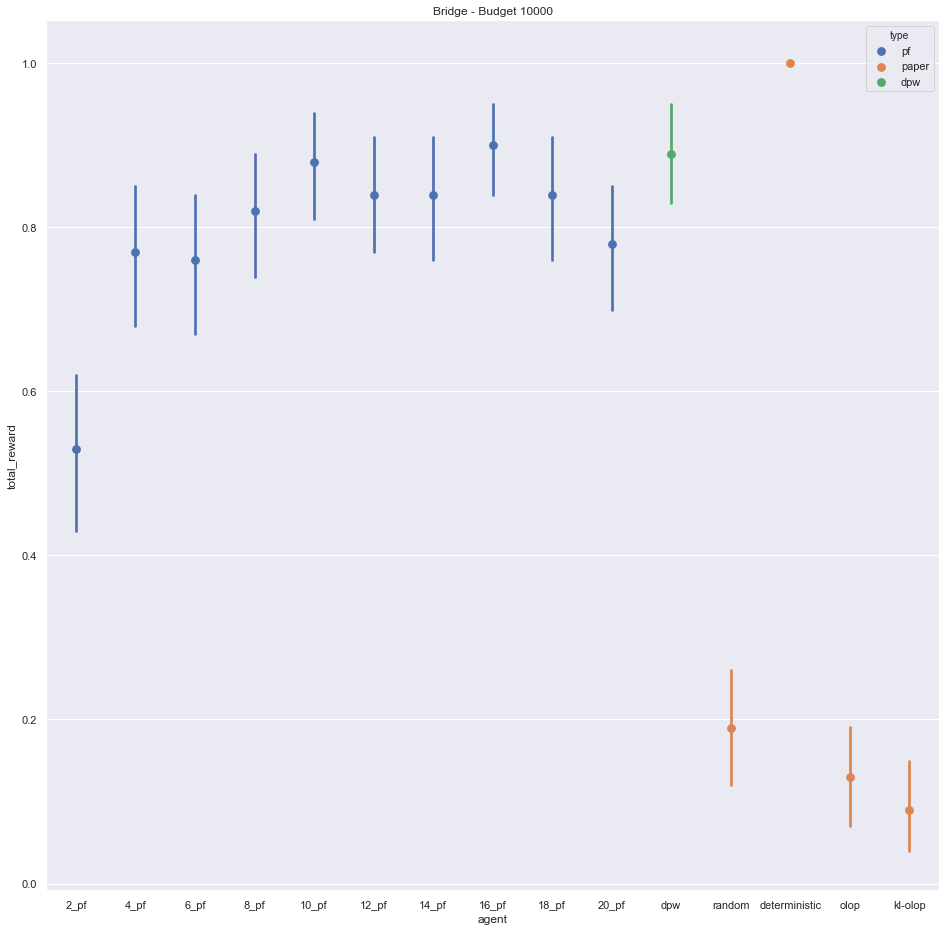

In [13]:
# print("Reading data from {}".format(data_path))
# df = pd.read_csv(data_path)
# df = df[~df.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
#df = df.sort_values(by="Particles")

for field in ["total_reward"]:
    #fig, ax = plt.subplots()
    sns.set(style="darkgrid")
    plt.figure(figsize=(16, 16))
    # ax.set(xscale="log")
    # sns.barplot(x="Particles", y="Cumulative reward", hue="Particles", data=df, dodge=False)
    #sns.pointplot(x="Particles", y="Cumulative reward", ax=ax, data=df, join=False, grid=True)
    plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                        order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)
    
    plot.set_title("{} - Budget {}".format(env, budget))

    
    field_path = "{}/{}_{}_{}.png".format(env, env.lower(), field, budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving {} plot to {}".format(field, field_path))